# Линейная регрессия и стохастический градиентный спуск

Задание основано на материалах лекций по линейной регрессии и градиентному спуску. Вы будете прогнозировать выручку компании в зависимости от уровня ее инвестиций в рекламу по TV, в газетах и по радио.

## Вы научитесь:
- решать задачу восстановления линейной регрессии
- реализовывать стохастический градиентный спуск для ее настройки
- решать задачу линейной регрессии аналитически

## Введение
Линейная регрессия - один из наиболее хорошо изученных методов машинного обучения, позволяющий прогнозировать значения количественного признака в виде линейной комбинации прочих признаков с параметрами - весами модели. Оптимальные (в смысле минимальности некоторого функционала ошибки) параметры линейной регрессии можно найти аналитически с помощью нормального уравнения или численно с помощью методов оптимизации.  

Линейная регрессия использует простой функционал качества - среднеквадратичную ошибку. Мы будем работать с выборкой, содержащей 3 признака. Для настройки параметров (весов) модели решается следующая задача:
$$\frac{1}{\ell}\sum_{i=1}^\ell{{(y_i - (w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}))}^2} \rightarrow \min_{w_0, w_1, w_2, w_3},$$
где $x_{i1}, x_{i2}, x_{i3}$ - значения признаков $i$-го объекта, $y_i$ - значение целевого признака $i$-го объекта, $\ell$ - число объектов в обучающей выборке.

## Градиентный спуск
Параметры $w_0, w_1, w_2, w_3$, по которым минимизируется среднеквадратичная ошибка, можно находить численно с помощью градиентного спуска.
Градиентный шаг для весов будет выглядеть следующим образом:
$$w_0 \leftarrow w_0 + \frac{2\eta}{\ell} \sum_{i=1}^\ell{{(y_i - (w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}))}}$$
$$w_j \leftarrow w_j + \frac{2\eta}{\ell} \sum_{i=1}^\ell{{x_{ij}(y_i - (w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}))}},\ j \in \{1,2,3\}$$
Здесь $\eta$ - параметр, шаг градиентного спуска.

## Стохастический градиентный спуск
У градиентного спуска, описанного выше, есть один недостаток. На больших выборках вычисление градиента по всем имеющимся данным на каждом шаге может быть вычислительно сложно. 
В стохастическом варианте градиентного спуска поправки для весов вычисляются только с учетом одного случайно взятого объекта обучающей выборки:
$$w_0 \leftarrow w_0 + \frac{2\eta}{\ell} {(y_k - (w_0 + w_1x_{k1} + w_2x_{k2} +  w_3x_{k3}))}$$
$$w_j \leftarrow w_j + \frac{2\eta}{\ell} {x_{kj}(y_k - (w_0 + w_1x_{k1} + w_2x_{k2} +  w_3x_{k3}))},\ j \in \{1,2,3\},$$
где $k$ - случайный индекс, $k \in \{1, \ldots, \ell\}$.

## Нормальное уравнение 
Нахождение вектора оптимальных весов $w$ может быть сделано и аналитически.
Мы хотим найти такой вектор весов $w$, чтобы вектор $y$, соответствующий целевому признаку, получался умножением матрицы $X$ (состоящей из всех признаков объектов обучающей выборки, кроме целевого) на вектор весов $w$. То есть, чтобы выполнялось матричное уравнение:
$$y = Xw$$
Домножением слева на $X^T$ получаем:
$$X^Ty = X^TXw$$
Это хорошо, поскольку теперь матрица $X^TX$ - квадратная, и можно найти решение (вектор $w$) в виде:
$$w = {(X^TX)}^{-1}X^Ty$$
Матрица ${(X^TX)}^{-1}X^T$ - [*псевдообратная*](https://ru.wikipedia.org/wiki/Псевдообратная_матрица) для матрицы $X$. В NumPy такую матрицу можно вычислить с помощью функции [numpy.linalg.pinv](http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.linalg.pinv.html).

Однако, нахождение псевдообратной матрицы - операция вычислительно сложная и нестабильная в случае малого определителя матрицы $X$ (проблема мультиколлинеарности). 
На практике лучше находить вектор весов $w$ решением матричного уравнения 
$$X^TXw = X^Ty$$Это может быть сделано с помощью функции [numpy.linalg.solve](http://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.linalg.solve.html).

Но все же на практике для больших матриц $X$ быстрее работает градиентный спуск, особенно его стохастическая версия.

## Инструкции по выполнению

В начале напишем простую функцию для записи ответов в текстовый файл. Ответами будут числа, полученные в ходе решения этого задания, округленные до 3 знаков после запятой. Полученные файлы после выполнения задания надо отправить в форму на странице задания на Coursera.org.

In [64]:
def write_answer_to_file(answer, filename):
    with open(filename, 'w') as f_out:
        f_out.write(str(round(answer, 3)))

**1. Загрузите данные из файла *advertising.csv* в объект pandas DataFrame. [Источник данных](http://www-bcf.usc.edu/~gareth/ISL/data.html).**

In [65]:
import pandas as pd
import seaborn as sns
import numpy as np

%matplotlib inline
adver_data = pd.read_csv('advertising.csv')

**Посмотрите на первые 5 записей и на статистику признаков в этом наборе данных.**

In [66]:
data = adver_data
data.head(5)

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


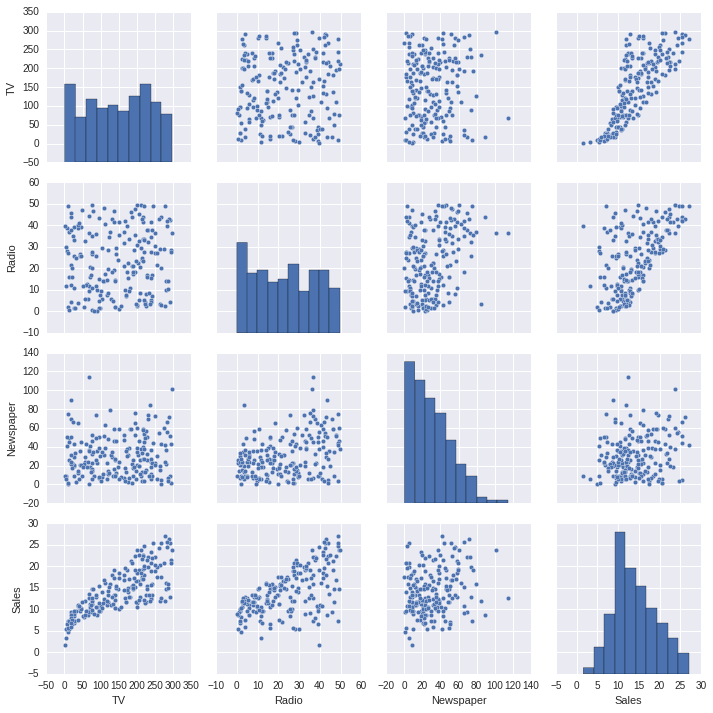

In [67]:
sns.pairplot(data)

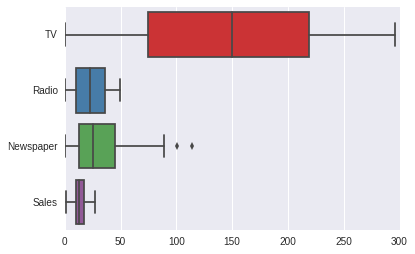

In [68]:
sns.boxplot(data=data, orient="h", palette="Set1", width = 0.8)

**Создайте массивы NumPy *X* из столбцов TV, Radio и Newspaper и *y* - из столбца Sales. Используйте атрибут *values* объекта pandas DataFrame.**

In [123]:
X = data[['TV', 'Radio', 'Newspaper']].values
y = data[['Sales']].values

In [124]:
y = data['Sales'].values
y

array([ 22.1,  10.4,   9.3,  18.5,  12.9,   7.2,  11.8,  13.2,   4.8,
        10.6,   8.6,  17.4,   9.2,   9.7,  19. ,  22.4,  12.5,  24.4,
        11.3,  14.6,  18. ,  12.5,   5.6,  15.5,   9.7,  12. ,  15. ,
        15.9,  18.9,  10.5,  21.4,  11.9,   9.6,  17.4,   9.5,  12.8,
        25.4,  14.7,  10.1,  21.5,  16.6,  17.1,  20.7,  12.9,   8.5,
        14.9,  10.6,  23.2,  14.8,   9.7,  11.4,  10.7,  22.6,  21.2,
        20.2,  23.7,   5.5,  13.2,  23.8,  18.4,   8.1,  24.2,  15.7,
        14. ,  18. ,   9.3,   9.5,  13.4,  18.9,  22.3,  18.3,  12.4,
         8.8,  11. ,  17. ,   8.7,   6.9,  14.2,   5.3,  11. ,  11.8,
        12.3,  11.3,  13.6,  21.7,  15.2,  12. ,  16. ,  12.9,  16.7,
        11.2,   7.3,  19.4,  22.2,  11.5,  16.9,  11.7,  15.5,  25.4,
        17.2,  11.7,  23.8,  14.8,  14.7,  20.7,  19.2,   7.2,   8.7,
         5.3,  19.8,  13.4,  21.8,  14.1,  15.9,  14.6,  12.6,  12.2,
         9.4,  15.9,   6.6,  15.5,   7. ,  11.6,  15.2,  19.7,  10.6,
         6.6,   8.8,

**Отмасштабируйте столбцы матрицы *X*, вычтя из каждого значения среднее по соответствующему столбцу и поделив результат на стандартное отклонение.**

In [125]:
means = np.array([data['TV'].mean(), data['Radio'].mean(), data['Newspaper'].mean()])
stds = np.array([data['TV'].std(), data['Radio'].std(), data['Newspaper'].std()])
print(means, stds)
#print( (X[0][0] - means[0]) / stds[0] )

[ 147.0425   23.264    30.554 ] [ 85.85423631  14.84680918  21.77862084]


In [126]:
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        X[i][j] = (X[i][j] - means[j]) / stds[j];

**Добавьте к матрице *X* столбец из единиц, используя методы *hstack*, *ones* и *reshape* библиотеки NumPy. Вектор из единиц нужен для того, чтобы не обрабатывать отдельно коэффициент $w_0$ линейной регрессии.**

In [127]:
a = np.ones((X.shape[0], 1), dtype=float)
X1 = np.hstack((a, X))
X = np.hstack((a, X))

In [128]:
X1

array([[  1.00000000e+00,   9.67424597e-01,   9.79065591e-01,
          1.77449253e+00],
       [  1.00000000e+00,  -1.19437904e+00,   1.08009740e+00,
          6.67902716e-01],
       [  1.00000000e+00,  -1.51235985e+00,   1.52463736e+00,
          1.77908419e+00],
       [  1.00000000e+00,   5.19193949e-02,   1.21480648e+00,
          1.28318502e+00],
       [  1.00000000e+00,   3.93195507e-01,  -8.39506984e-01,
          1.27859336e+00],
       [  1.00000000e+00,  -1.61136487e+00,   1.72670098e+00,
          2.04080875e+00],
       [  1.00000000e+00,  -1.04295960e+00,   6.42292892e-01,
         -3.23895625e-01],
       [  1.00000000e+00,  -3.12652015e-01,  -2.46787034e-01,
         -8.70303044e-01],
       [  1.00000000e+00,  -1.61252963e+00,  -1.42549148e+00,
         -1.35701890e+00],
       [  1.00000000e+00,   6.14500836e-01,  -1.39181421e+00,
         -4.29503781e-01],
       [  1.00000000e+00,  -9.42789820e-01,  -1.17627968e+00,
         -2.91754012e-01],
       [  1.00000000e

**2. Реализуйте функцию *mserror* - среднеквадратичную ошибку прогноза. Она принимает два аргумента - объекты Series *y* (значения целевого признака) и *y\_pred* (предсказанные значения).**

In [129]:
import math as m
def mserror(y, y_pred):
    answer = 0.0
    #print("вход...")
    #print("y shape=",y.shape, "y_pred shape=",y_pred.shape)
    for i in range(y.shape[0]):
        sqare1 = 0
        #print(sqare1, "должно быть 0...")
        for j in range(y.shape[1]):
            #print("i=",i,"j=",j)
            sqare1 += y[i][j]
            #print("sqare1=",sqare1, "y_pred[",i,"][0]=",y_pred[i][0])
        answer += ((sqare1 - y_pred[i][0]) ** 2) / y.shape[0]
        #print(answer)
    return answer

**Какова среднеквадратичная ошибка прогноза значений Sales, если всегда предсказывать медианное значение Sales по исходной выборке? Запишите ответ в файл '1.txt'.**

In [133]:
sales_med = np.empty_like(y, dtype=float)
med_y = np.median(y)
for i in range(y.shape[1]):
    sales_med[i][0] = med_y
#print(sales_med)
answer1 = mserror(y, sales_med)
print(answer1)
write_answer_to_file(answer1, '1.txt')

TypeError: 'numpy.float64' object does not support item assignment

**3. Реализуйте функцию *normal_equation*, которая по заданным матрицам (массивам NumPy) *X* и *y* вычисляет вектор весов $w$ согласно нормальному уравнению линейной регрессии.**

In [92]:
def normal_equation(X, y):
    X_T = np.transpose(X)
    prod = np.dot(X_T, X)
    prod_inv = np.linalg.inv(prod)
    prod2 = np.dot(prod_inv, X_T)
    w = np.dot(prod2, y)
    return w

In [93]:
norm_eq_weights = normal_equation(X, y)
print(norm_eq_weights)

[[ 14.0225    ]
 [  3.92908869]
 [  2.79906919]
 [ -0.02259517]]


**Какие продажи предсказываются линейной моделью с весами, найденными с помощью нормального уравнения, в случае средних инвестиций в рекламу по ТВ, радио и в газетах? (то есть при нулевых значениях масштабированных признаков TV, Radio и Newspaper). Запишите ответ в файл '2.txt'.**

In [94]:
means = np.array ([1.0, data['TV'].mean(), data['Radio'].mean(), data['Newspaper'].mean()])
answer2 = norm_eq_weights[0]
print(answer2)
write_answer_to_file(answer2[0], '2.txt')

[ 14.0225]


**4. Напишите функцию *linear_prediction*, которая принимает на вход матрицу *X* и вектор весов линейной модели *w*, а возвращает вектор прогнозов в виде линейной комбинации столбцов матрицы *X* с весами *w*.**

In [95]:
def linear_prediction(X, w):
    return np.dot(X, w)

**Какова среднеквадратичная ошибка прогноза значений Sales в виде линейной модели с весами, найденными с помощью нормального уравнения? Запишите ответ в файл '3.txt'.**

In [96]:
y_predict = linear_prediction(X, norm_eq_weights)
answer3 = mserror(y_predict, y)
print(answer3)
write_answer_to_file(answer3, '3.txt')

2.78412631451


**5. Напишите функцию *stochastic_gradient_step*, реализующую шаг стохастического градиентного спуска для линейной регрессии. Функция должна принимать матрицу *X*, вектора *y* и *w*, число *train_ind* - индекс объекта обучающей выборки (строки матрицы *X*), по которому считается изменение весов, а также число *$\eta$* (eta) - шаг градиентного спуска (по умолчанию *eta*=0.01). Результатом будет вектор обновленных весов.**

In [97]:
def stochastic_gradient_step(X, y, w, train_ind, eta=0.01):
    w_new = w + 2 * eta * X[train_ind] * (y[train_ind] - X[train_ind].dot(w)) / len(X)
    return w_new

**6. Напишите функцию *stochastic_gradient_descent*, реализующую стохастический градиентный спуск для линейной регрессии. Функция принимает на вход следующие аргументы:**
- X - матрица, соответствующая обучающей выборке
- y - вектор значений целевого признака
- w_init - вектор начальных весов модели
- eta - шаг градиентного спуска (по умолчанию 0.01)
- max_iter - максимальное число итераций градиентного спуска (по умолчанию 10000)
- max_weight_dist - минимальное евклидово расстояние между векторами весов на соседних итерациях градиентного спуска,
при котором алгоритм прекращает работу (по умолчанию 1e-8)
- seed - число, используемое для воспроизводимости сгенерированных псевдослучайных чисел (по умолчанию 42)
- verbose - флаг печати информации (например, для отладки, по умолчанию False)

**На каждой итерации в вектор (список) должно записываться текущее значение среднеквадратичной ошибки. Функция должна возвращать вектор весов $w$, а также вектор (список) ошибок.**

In [98]:
def stochastic_gradient_descent(X, y, w_init, eta=1e-2, max_iter=1e5,
                                min_weight_dist=1e-8, seed=42, verbose=False):
    # Инициализируем расстояние между векторами весов на соседних
    # итерациях большим числом. 
    weight_dist = np.inf
    # Инициализируем вектор весов
    w = w_init
    # Сюда будем записывать ошибки на каждой итерации
    errors = []
    # Счетчик итераций
    iter_num = 0
    # Будем порождать псевдослучайные числа 
    # (номер объекта, который будет менять веса), а для воспроизводимости
    # этой последовательности псевдослучайных чисел используем seed.
    np.random.seed(seed)
        
    # Основной цикл
    while weight_dist > min_weight_dist and iter_num < max_iter:
        # порождаем псевдослучайный 
        # индекс объекта обучающей выборки
        random_ind = np.random.randint(X.shape[0])
        lin_pred = linear_prediction(X, w).reshape(len(y), 1)
        errors.append(mserror(y, lin_pred))
        w_new = stochastic_gradient_step(X, y, w, train_ind=random_ind)
        weight_dist = np.linalg.norm(w - w_new)
        w = w_new
        iter_num += 1
        
        if (verbose):
            with open('log.txt', 'a') as logfile:
                logfile.write("Step %d: old_w = %s, w = %s, error = %s\n" % (iter_num, old_w, w, errors[iter_num - 1]))
        # Ваш код здесь

    return w, errors

 **Запустите $10^5$ итераций стохастического градиентного спуска. Укажите вектор начальных весов *w_init*, состоящий из нулей. Оставьте параметры  *eta* и *seed* равными их значениям по умолчанию (*eta*=0.01, *seed*=42 - это важно для проверки ответов).**

In [115]:
%%time
stoch_grad_desc_weights, stoch_errors_by_iter = stochastic_gradient_descent(X1, y, w_init=[0., 0., 0., 0.], max_iter=1e5)

CPU times: user 2min 47s, sys: 112 ms, total: 2min 47s
Wall time: 2min 47s


In [117]:
print(X1.shape, y.shape)

(200, 4) (200, 1)


Populating the interactive namespace from numpy and matplotlib


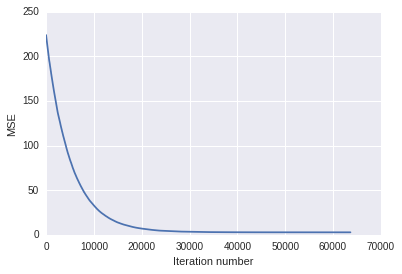

In [116]:
%pylab inline
plot(range(len(stoch_errors_by_iter)), stoch_errors_by_iter)
xlabel('Iteration number')
ylabel('MSE')

**Посмотрим на вектор весов, к которому сошелся метод.**

In [ ]:
stoch_grad_desc_weights.reshape(norm_eq_weights.shape[0], norm_eq_weights.shape[1])

**Посмотрим на среднеквадратичную ошибку на последней итерации.**

In [61]:
X = data[['TV', 'Radio', 'Newspaper']].values
y = data[['Sales']].values
means = np.array([data['TV'].mean(), data['Radio'].mean(), data['Newspaper'].mean()])
stds = np.array([data['TV'].std(), data['Radio'].std(), data['Newspaper'].std()])
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        X[i][j] = (X[i][j] - means[j]) / stds[j];

**Какова среднеквадратичная ошибка прогноза значений Sales в виде линейной модели с весами, найденными с помощью градиентного спуска? Запишите ответ в файл '4.txt'.**

In [3]:
answer4 = mserror(linear_prediction(X, y, stoch_grad_desc_weights).reshape(len(y), 1))
print(answer4)
write_answer_to_file(answer4, '4.txt')

NameError: name 'mserror' is not defined

**Ответами к заданию будут текстовые файлы, полученные в ходе этого решения. Обратите внимание, что отправленные файлы не должны содержать пустую строку в конце. Данный нюанс является ограничением платформы Coursera. Мы работаем над исправлением этого ограничения.**